In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv('./data/measurements.csv')
df.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
df['temp_inside'].unique() #'21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       #'22', '19', '24,5', '25,5'

#I will replace nan values with median

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [6]:
df['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [7]:
df.isna().sum()
#I will replace nan to 0 in refill liters and gas
# specials - more to think


distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [8]:
df2=pd.read_excel('./data/measurements2.xlsx')
df2.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [9]:
df2.info()
#looks like df2 has same info but with correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [10]:
df2.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [11]:
# I want to check what are the unique values of AC (air conditioner) rain and sun
df2['AC'].unique() # 0- 

array([0, 1], dtype=int64)

In [12]:
df2['AC'].value_counts()

0    358
1     30
Name: AC, dtype: int64

In [13]:
df2['rain'].value_counts() #would be logical to have 0 in rain as much as 1 in sun, but not
#we can also see that this data with sun and rain is not imbalanced.
#partly we have information in graph "specials"

0    340
1     48
Name: rain, dtype: int64

In [14]:
df2['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

#fixing special column

In [15]:
df2['specials'].unique()


array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [16]:
df2['specials'].value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [17]:
df2['specials'] = df2['specials'].fillna('unknown')

In [18]:
def cleanSpecials(x): #cleaning the
    x = x.lower()
    if 'rain' in x:
        return "rain"
    elif 'sun' in x:
        return "sun"
    else:
        return 'unknown'
# I put AC to unknown.


In [19]:
df2['specials'] = df2['specials'].apply(cleanSpecials)

In [20]:
df2['specials'].value_counts(dropna=False)

unknown    313
rain        43
sun         32
Name: specials, dtype: int64

fixing refill liters and refill gas

In [21]:
df2['refill liters'] = df2['refill liters'].fillna(0) #I put 0 instead of NaN for refill liters

In [22]:
df2['refill gas'] = df['refill gas'].fillna('not_refilled')

#fixing temperature inside

In [23]:
df2['temp_inside'].value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [24]:
m=df2[df2['temp_inside'].notna()]['temp_inside'].mode()[0]

In [25]:
df2['temp_inside']=df2['temp_inside'].fillna(m)


In [26]:
df2.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

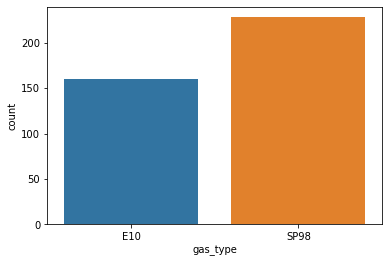

In [27]:
sns.countplot(data = df, x = "gas_type")
plt.show()

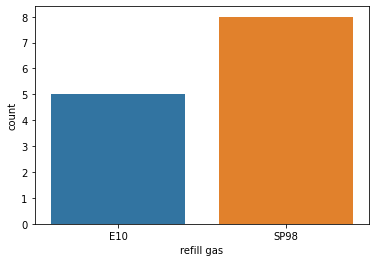

In [28]:
sns.countplot(data = df, x = "refill gas")
plt.show()



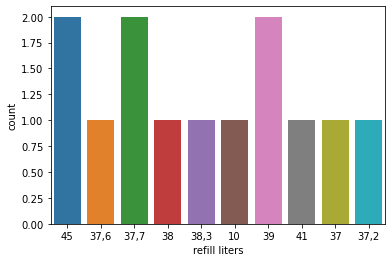

In [29]:
sns.countplot(data = df, x = "refill liters")
plt.show()


In [107]:
df_e10=df2.loc[(df2['gas_type']=='E10')]
df_sp98=df2.loc[(df2['gas_type']=='SP98')]

<AxesSubplot:xlabel='speed', ylabel='consume'>

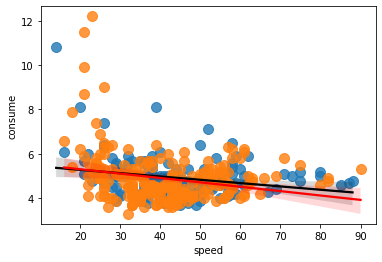

In [109]:

sns.regplot(x = df_e10['speed'], y = df_e10['consume'], data = df_e10, scatter_kws={'s':100}, line_kws={"color": "black"})
sns.regplot(x = df_sp98['speed'], y = df_sp98['consume'], data = df_sp98, scatter_kws={'s':100}, line_kws={"color": "red"})

<AxesSubplot:xlabel='distance', ylabel='consume'>

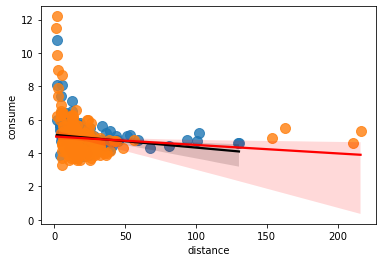

In [110]:
sns.regplot(x = df_e10['distance'], y = df_e10['consume'], data = df_e10, scatter_kws={'s':100}, line_kws={"color": "black"})
sns.regplot(x = df_sp98['distance'], y = df_sp98['consume'], data = df_sp98, scatter_kws={'s':100}, line_kws={"color": "red"})



<AxesSubplot:xlabel='temp_inside', ylabel='consume'>

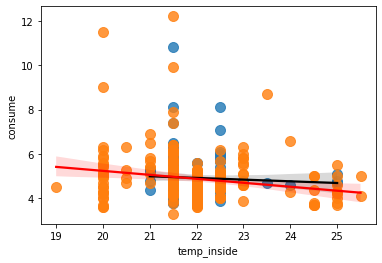

In [113]:
sns.regplot(x = df_e10['temp_inside'], y = df_e10['consume'], data = df_e10, scatter_kws={'s':100}, line_kws={"color": "black"})
sns.regplot(x = df_sp98['temp_inside'], y = df_sp98['consume'], data = df_sp98, scatter_kws={'s':100}, line_kws={"color": "red"})



<AxesSubplot:xlabel='temp_outside', ylabel='consume'>

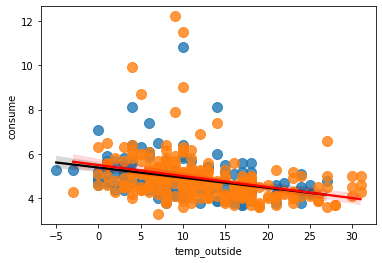

In [115]:
sns.regplot(x = df_e10['temp_outside'], y = df_e10['consume'], data = df_e10, scatter_kws={'s':100}, line_kws={"color": "black"})
sns.regplot(x = df_sp98['temp_outside'], y = df_sp98['consume'], data = df_sp98, scatter_kws={'s':100}, line_kws={"color": "red"})


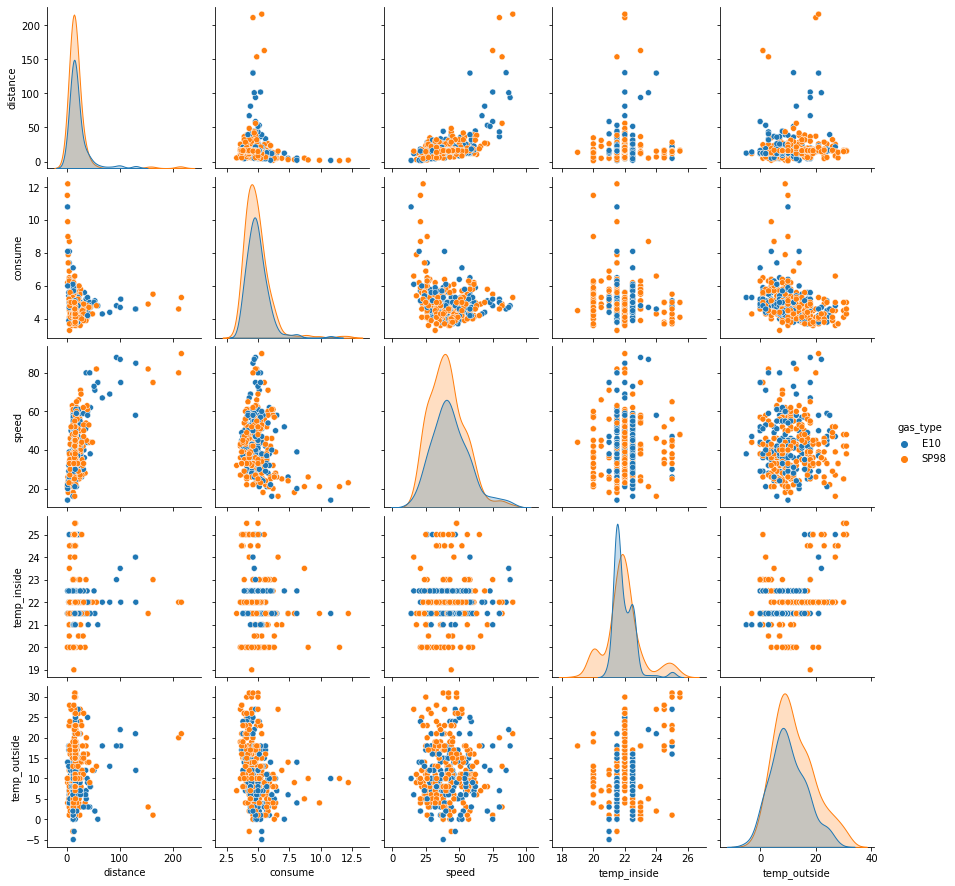

In [91]:
sns.pairplot(data = df2[["distance", "consume", "speed", "temp_inside", "temp_outside", "specials", 'gas_type']], hue="gas_type")
plt.show()

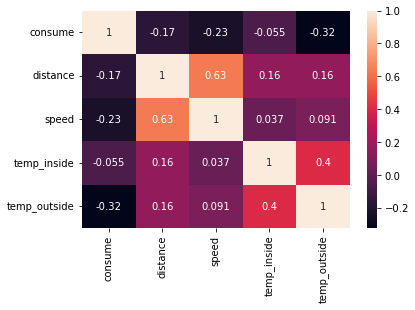

In [111]:
for_corr_e10=pd.concat([df_e10[['consume']], df_e10[["distance"]],df_e10[['speed']], df_e10[['temp_inside']], df_e10[['temp_outside']]],axis=1)
correlations_matrix = for_corr_e10.corr()
correlations_matrix
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

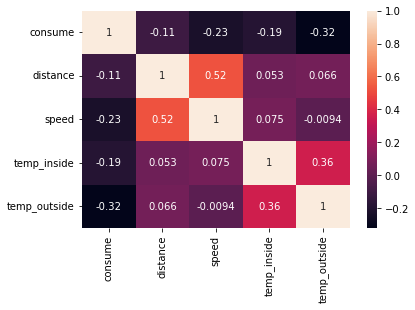

In [112]:
for_corr_sp98=pd.concat([df_sp98[['consume']], df_sp98[["distance"]],df_sp98[['speed']], df_sp98[['temp_inside']], df_sp98[['temp_outside']]],axis=1)
correlations_matrix = for_corr_sp98.corr()
correlations_matrix
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

#X-y split
Encoding and normalizing

In [30]:
df2.head() #we need to encode the categorical data. it's specials, gas_type and refill_gas

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0,0.0,not_refilled
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0,0.0,not_refilled
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0,0.0,not_refilled
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0,0.0,not_refilled


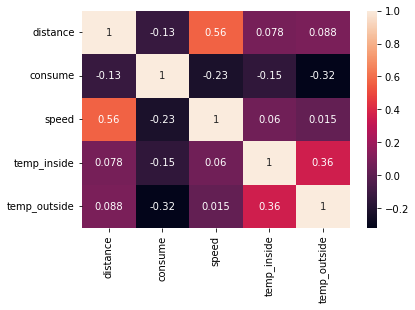

In [31]:
for_corr_matrix=pd.concat([df2[["distance"]], df2[['consume']],df2[['speed']], df2[['temp_inside']], df2[['temp_outside']]],axis=1)
correlations_matrix = for_corr_matrix.corr()
correlations_matrix
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()
#there is no big correlations between, so we keep all columns

In [32]:
X=df2.drop('consume', axis=1)
y=df2['consume']

In [33]:
cat=X.select_dtypes('object')
num=X.select_dtypes('float')
nc=X.select_dtypes('int')

In [37]:
encoder = OneHotEncoder(drop='first').fit(cat)
encoded_cat = encoder.transform(cat).toarray()
encoded_cat_pd = pd.DataFrame(encoded_cat)
encoded_cat_pd.columns = encoder.get_feature_names_out()

In [38]:
scaler = MinMaxScaler()

In [39]:

num_scaled = scaler.fit_transform(num)
num_scaled_df = pd.DataFrame(num_scaled, columns = num.columns)



In [65]:
X = pd.concat([num_scaled_df, encoded_cat_pd, nc], axis=1)
X

,distance,speed,temp_inside,temp_outside,specials_sun,specials_unknown,gas_type_SP98,refill gas_SP98,refill gas_not_refilled,speed,temp_outside,AC,rain,sun
0,0.124302,0.157895,0.384615,0.472222,0.0,1.0,0.0,0.0,0.0,26,12,0,0,0
1,0.049814,0.210526,0.384615,0.500000,0.0,1.0,0.0,0.0,1.0,30,13,0,0,0
2,0.046089,0.315789,0.384615,0.555556,0.0,1.0,0.0,0.0,1.0,38,15,0,0,0
3,0.054004,0.289474,0.384615,0.527778,0.0,1.0,0.0,0.0,1.0,36,14,0,0,0
4,0.080074,0.421053,0.384615,0.555556,0.0,1.0,0.0,0.0,1.0,46,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.068436,0.328947,0.846154,0.638889,0.0,1.0,1.0,0.0,1.0,39,18,0,0,0
384,0.068901,0.315789,0.923077,1.000000,0.0,1.0,1.0,0.0,1.0,38,31,1,0,0
385,0.068436,0.407895,0.923077,0.666667,0.0,1.0,1.0,0.0,1.0,45,19,0,0,0
386,0.065642,0.368421,0.923077,1.000000,0.0,1.0,1.0,0.0,1.0,42,31,1,0,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [67]:
print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')

X_train: (310, 14)
X_test:  (78, 14)
y_train: (310,)
y_test:  (78,)


In [68]:
# Apply linear regression, train/fit the model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [69]:
# Predict training set
y_pred_train = lm.predict(X_train)
#print(f"y_pred_train = {y_pred_train}")

# R2 score for training set
r2_train = r2_score(y_train, y_pred_train)
print(f"r2_train     = {r2_train}")

# Predict test set
y_pred_test  = lm.predict(X_test)
#print(f"y_pred_test = {y_pred_test}")

# R2 score for test set
r2_test = r2_score(y_test, y_pred_test)
print(f"r2_test     = {r2_test}")

 # MSE - Mean Squared Error
mse = mean_squared_error(y_test,y_pred_test)
print(f'MSE = {mse}')

    # RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'RMSE = {rmse}')

    # MAE - Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print(f'MAE = {mae}')
#0.255 - is a very bad prediction 

r2_train     = 0.2517170364517324
r2_test     = 0.13832075277028888
MSE = 0.8434372539616002
RMSE = 0.9183884003849353
MAE = 0.5576990178637533


Let's use different models

In [79]:
for_regr = RandomForestRegressor(max_depth=10,
                             criterion="squared_error",
                             min_samples_split=2,
                             min_samples_leaf =2,
                             random_state = 42)
for_regr.fit(X_train,y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(for_regr.score(X_train,y_train)))
print("The accuracy for the Random Forest in the TEST  set is {:.2f}".format(for_regr.score(X_test, y_test)))


y_pred = for_regr.predict(X_test)


The accuracy for the Random Forest in the TRAIN set is 0.88
The accuracy for the Random Forest in the TEST  set is 0.51
